In [2]:
import matplotlib.pyplot as plt
import json
from run import run as run_lca
from run_baseline import run as run_baseline
from tools import *
from init_logger import init_logger


In [3]:
zebra_exp_log_path = 'tmp/logs/zebra_exp.log'
zebra_gamma_log_path = 'tmp/logs/zebra_gamma.log'

elephants_exp_log_path = 'tmp/logs/forestelephants_exp.log'
elephants_gamma_log_path = 'tmp/logs/forestelephants_gamma.log'

def read_log(path):
    with open(path) as f:
        log = f.read()
    return log

zebra_exp_log = read_log(zebra_exp_log_path)
zebra_gamma_log = read_log(zebra_gamma_log_path)

elephants_exp_log = read_log(elephants_exp_log_path)
elephants_gamma_log = read_log(elephants_gamma_log_path)


baseline_log_path = 'tmp/logs/zebra_baseline.log'


In [4]:
import re


def extract_stats(log, stats='Basic stats'):
    m = re.findall(rf'{stats}: (?s:.+?)(?=per)', log)
    def process_match(match):
        return dict(re.findall(r'"(.+?)": (.+?),', match))
    return [process_match(match) for match in m]

zebra_exp_log_basic = extract_stats(zebra_exp_log, 'Basic stats')
zebra_exp_log_reachable = extract_stats(zebra_exp_log, 'Reachable stats')

zebra_gamma_log_basic = extract_stats(zebra_gamma_log, 'Basic stats')
zebra_gamma_log_reachable = extract_stats(zebra_gamma_log, 'Reachable stats')

elephants_exp_log_basic = extract_stats(elephants_exp_log, 'Basic stats')
elephants_exp_log_reachable = extract_stats(elephants_exp_log, 'Reachable stats')

elephants_gamma_log_basic = extract_stats(elephants_gamma_log, 'Basic stats')
elephants_gamma_log_reachable = extract_stats(elephants_gamma_log, 'Reachable stats')


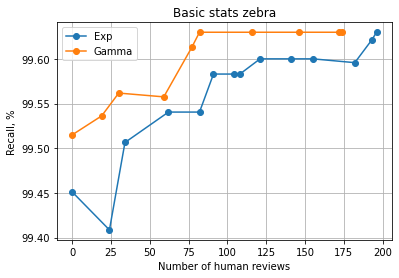

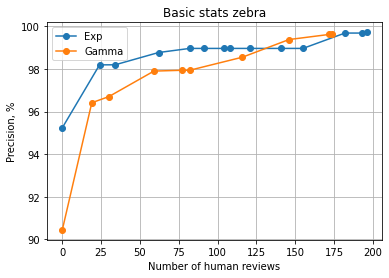

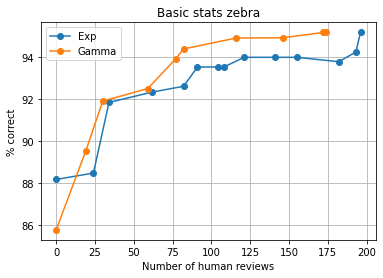

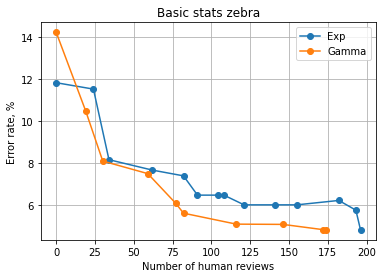

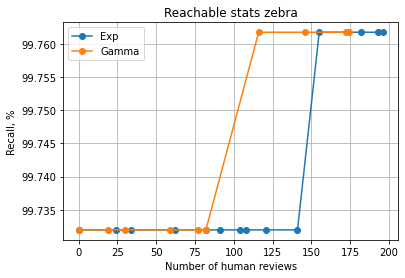

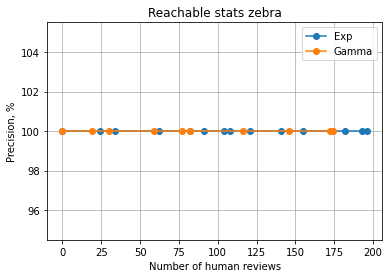

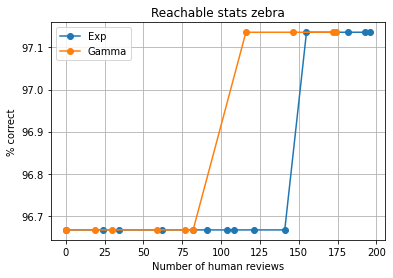

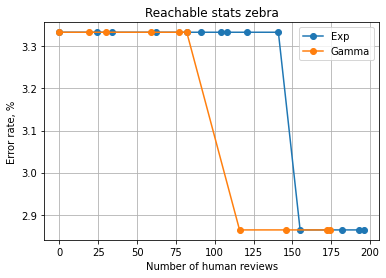

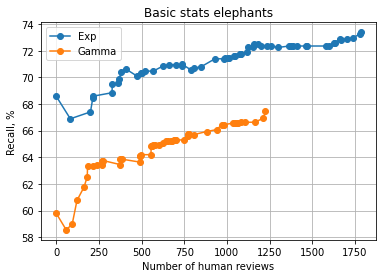

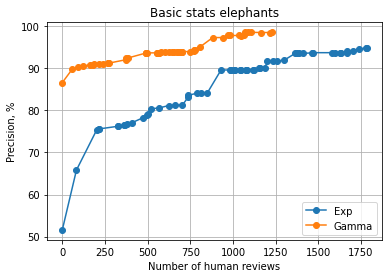

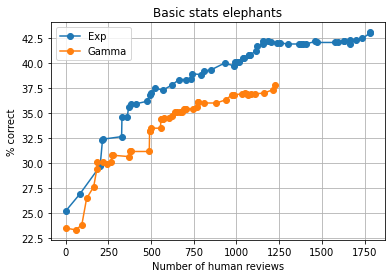

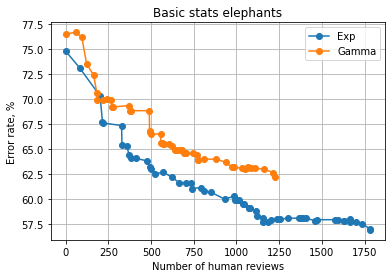

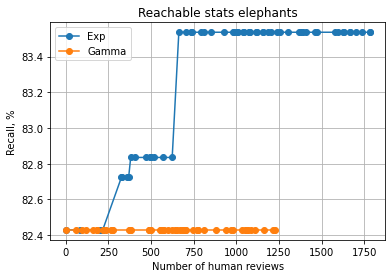

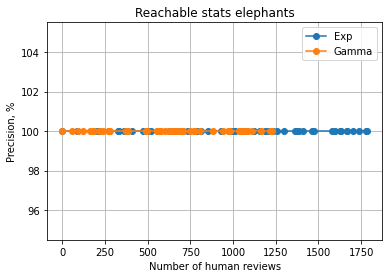

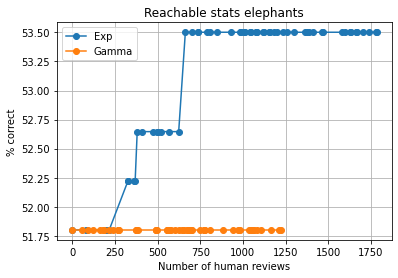

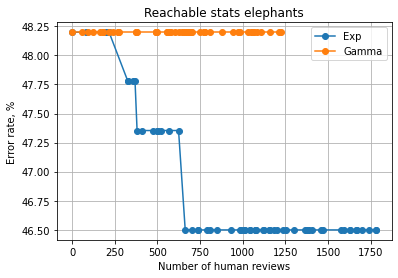

In [8]:
def identity(x):
    return x


def plot(data_lca, data_baseline, x, y, save_path, species, xlabel=None, ylabel=None, xmapping=identity, ymapping=identity, label1="", label2=""):
    if xlabel is None:
        xlabel = x
    if ylabel is None:
        ylabel = y
    
    x_values_lca = [xmapping(entry[x]) for entry in data_lca]
    y_values_lca = [ymapping(entry[y]) for entry in data_lca]

    x_values_baseline = [xmapping(entry[x]) for entry in data_baseline]
    y_values_baseline = [ymapping(entry[y]) for entry in data_baseline]


    sorted_data_lca = sorted(zip(x_values_lca, y_values_lca))
    sorted_data_baseline = sorted(zip(x_values_baseline, y_values_baseline))


    x_values_lca, y_values_lca = zip(*sorted_data_lca)
    x_values_baseline, y_values_baseline = zip(*sorted_data_baseline)


    plt.plot(x_values_lca, y_values_lca, marker='o', label=label1)
    plt.plot(x_values_baseline, y_values_baseline, marker='o', label=label2)


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(species)
    plt.grid(True)
    plt.legend()


    # plt.savefig(save_path)


    plt.show()

def to_percent(x):
    return 100 * float(x)

# plot(basic_stats, stats_baseline, 
#      "num human", "frac correct", None, "zebra",
#      xlabel="Number of human reviews", 
#      ylabel="% of correct matches", 
#      xmapping=int,
#      ymapping=to_percent)
# plot(basic_stats, stats_baseline, 
#      "num human", "precision", None, "zebra",
#      xlabel="Number of human reviews", 
#      ylabel="Precision", 
#      xmapping=int,
#      ymapping=to_percent)

for (stats1, stats2, title) in [(zebra_exp_log_basic, zebra_gamma_log_basic, "Basic stats zebra"),
        (zebra_exp_log_reachable, zebra_gamma_log_reachable, "Reachable stats zebra"),
        (elephants_exp_log_basic, elephants_gamma_log_basic, "Basic stats elephants"),
        (elephants_exp_log_reachable, elephants_gamma_log_reachable, "Reachable stats elephants")]:
    for (metric, label) in [("recall", "Recall, %"), ("precision", "Precision, %"), ("frac correct", "% correct"), ("error_rate", "Error rate, %")]:
        plot(stats1, stats2, 
            "num human", metric, None, title,
            xlabel="Number of human reviews", 
            ylabel=label, 
            xmapping=int,
            ymapping=to_percent,
            label1="Exp",
            label2="Gamma")